<h1 style="font-size:32px">
    <b><center>Lending Club Case Study</center></b> 
</h1>

## Problem Statement
#### Identify loan applicants who are likely to default

## Approach
### Perform Exploratory Data Analysis to identify features indicating applicants who are not likely to pay the loan
* Load the data and perform necessary cleaning
* Perform Univariate, Bivariate analysis on features
* Plot different visuals to extract insights from the data
* Present and summarize the findings

In [1]:
%matplotlib notebook
import pandas as pd #pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
import numpy as np #Do aritmetic operations on arrays

# matplotlib: used to plot graphs
import matplotlib
# matplotlib.use('nbagg') : matplotlib uses this protocol which makes plots more user intractive like zoom in and zoom out
matplotlib.use('nbagg')
import statsmodels.api as sm
# Initialize plotly
import matplotlib.pylab as plt
import seaborn as sns #Plots
from matplotlib import rcParams #Size of plots  
rcParams['figure.figsize'] = (8, 5)
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'loan.csv')

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

In [5]:
df.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [6]:
# drop columns where all values are NA
df.dropna(axis=1, inplace=True, how='all')

In [7]:
# keeping only Fully Paid and Charged Off loan_status
df = df[df.loan_status != 'Current']

In [8]:
df.shape

(38577, 57)

In [9]:
# check for null values in df
df.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        35837
mths_since_last_delinq        24905
desc                          12529
emp_title                      2386
emp_length                     1033
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

In [10]:
# removing irrelevant columns
df.drop(['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc', 'emp_title', 'tax_liens', 'member_id', 'zip_code', 'url'], axis=1, inplace=True)

In [11]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,...,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [12]:
# fixing emp_length column

df.emp_length.fillna('0',inplace=True)
df['emp_length']=df.emp_length.str.extract('(\d+)').astype(int)
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3,...,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [13]:
# removing "%" from int_rate
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)

# removing "months" from term columns
df.term = df.term.apply(lambda x: int(x.replace(" months", "").strip()))

In [14]:
df.dtypes

id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int64
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                      int32
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util  

## Univariate Analysis

In [15]:
# percentage loan_status values
df.loan_status.value_counts(normalize=True) * 100

loan_status
Fully Paid     85.413588
Charged Off    14.586412
Name: proportion, dtype: float64

* More than 80% of the loans have been Fully Paid off.
* Around 15% of the loans contribute to Default.

In [16]:
df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

* The average loan amount is around 11k.
* The median loan amount is 9.6k, which is not far from the mean.
* This indicates that loan_amnt does not have any significant outliers.

This can be further verified using a box plot.

<AxesSubplot:>

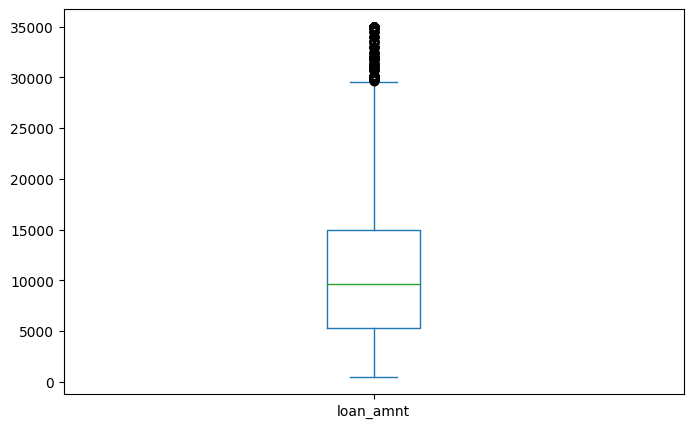

In [17]:
%matplotlib inline
df.loan_amnt.plot(kind='box')

* The above plot shows that most loans amounts are between 5k and 15k.

In [18]:
df.annual_inc.describe().apply(lambda x: format(x, 'f'))

count      38577.000000
mean       68777.973681
std        64218.681802
min         4000.000000
25%        40000.000000
50%        58868.000000
75%        82000.000000
max      6000000.000000
Name: annual_inc, dtype: object

* The average annual income is around 69k.
* The median annual income is 59k, which is far from the mean
* This indicates that annual_inc might have outliers.

This can be further verified using a box plot.

<AxesSubplot:>

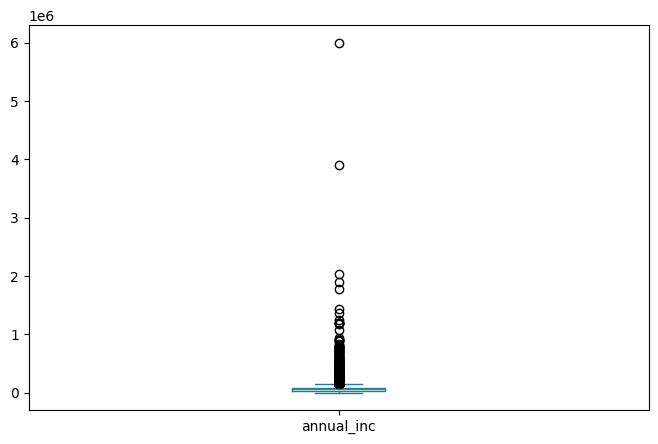

In [19]:
%matplotlib inline
df.annual_inc.plot(kind='box')

* The above plot clearly indicates outliers in annual_income. We can print percentiles and then remove outliers.

In [69]:
for p in range(10, 101, 10):
    print(p, "percentile:", np.percentile(df.annual_inc, p))

10 percentile: 30000.0
20 percentile: 37000.0
30 percentile: 44000.0
40 percentile: 50000.0
50 percentile: 58000.0
60 percentile: 65000.0
70 percentile: 75000.0
80 percentile: 90000.0
90 percentile: 111000.0
100 percentile: 234000.0


* There's a sudden spike after 90th percentile. Let's confirm this with a line plot.

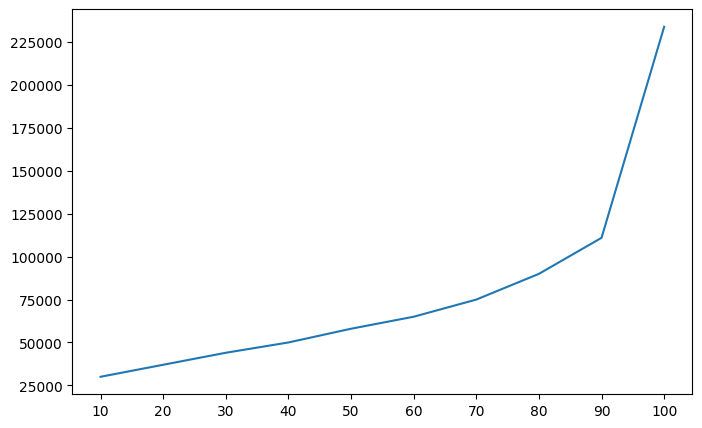

In [67]:
rnge = list(range(10, 101, 10))
sns.lineplot(x=rnge, y = [np.percentile(df.annual_inc, p) for p in rnge])
plt.xticks(rnge)
plt.show()

* The plot confirms a sudden spike after 90th percentile. Let's investigate it and remove outliers.

In [70]:
for p in range(90, 101):
    print(p, "percentile:", np.percentile(df.annual_inc, p))

90 percentile: 111000.0
91 percentile: 116000.0
92 percentile: 120000.0
93 percentile: 123000.0
94 percentile: 128000.0
95 percentile: 135000.0
96 percentile: 140992.2
97 percentile: 150000.0
98 percentile: 165000.0
99 percentile: 189000.0
100 percentile: 234000.0


In [22]:
# Let's remove annual_inc above 99th percentile
df = df[df.annual_inc <= np.percentile(df.annual_inc, 99)]

<AxesSubplot:>

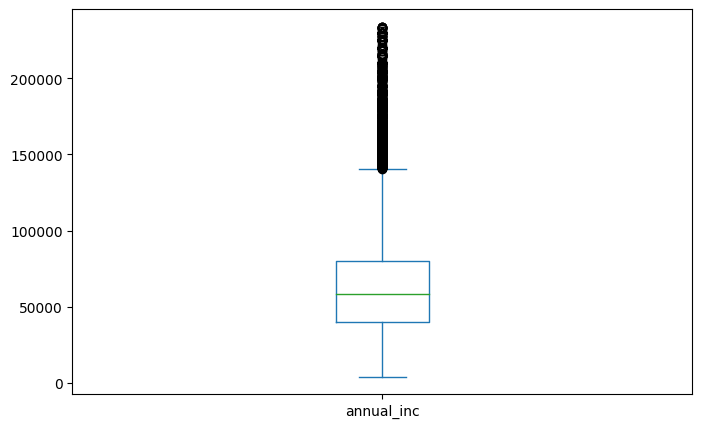

In [23]:
%matplotlib inline
df.annual_inc.plot(kind='box')

* After removing outliers, we can see most of the annual income lies between 50k and 80k.

<AxesSubplot:ylabel='int_rate'>

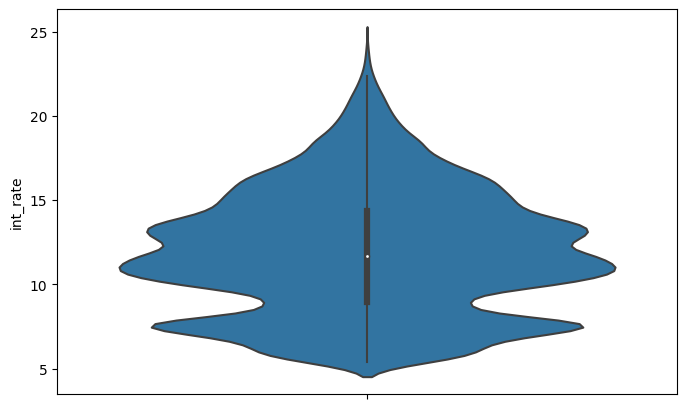

In [47]:
%matplotlib inline
sns.violinplot(data=df, y='int_rate')

* Above plot shows that most of the loans issues have an interest rate between 10% and 15%.
* Violinplot also shows the distribution on interest rates. There's a high number of loans between 5% and 10% too.

In [25]:
df.issue_d = pd.to_datetime(df.issue_d, format="%b-%y")

In [26]:
df['issue_year'] = df['issue_d'].apply(lambda x: x.year)

In [27]:
df.groupby(['issue_year', 'loan_status']).count()['id']

issue_year  loan_status
2007        Charged Off       43
            Fully Paid       204
2008        Charged Off      246
            Fully Paid      1306
2009        Charged Off      590
            Fully Paid      4072
2010        Charged Off     1466
            Fully Paid      9946
2011        Charged Off     3239
            Fully Paid     17079
Name: id, dtype: int64

<AxesSubplot:xlabel='issue_year', ylabel='count'>

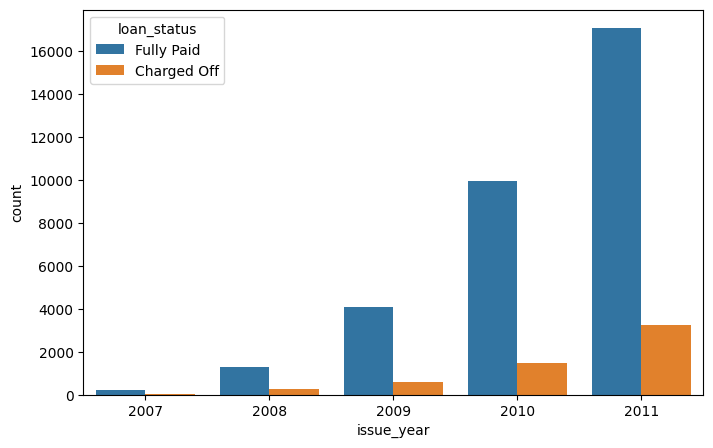

In [28]:
sns.countplot(data=df, x='issue_year', hue='loan_status')

* The above plot shows that most of the loans were issued in the year 2011.
* The default loans are highest in the year 2011 too.

<AxesSubplot:xlabel='count', ylabel='purpose'>

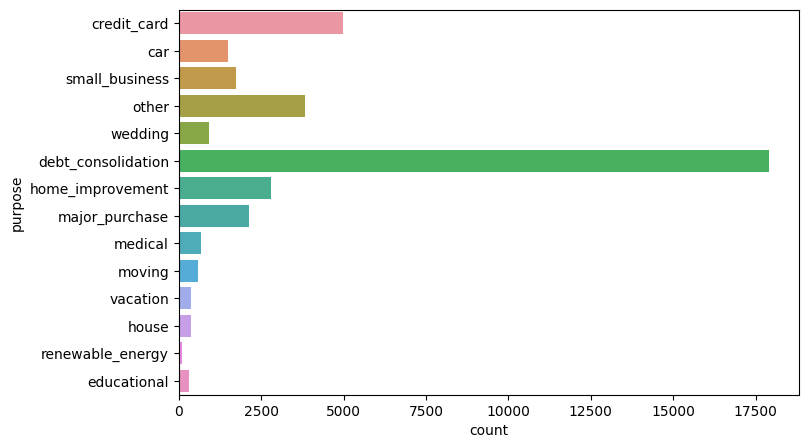

In [29]:
sns.countplot(data=df, y='purpose')

* Most of the loans were taken to clear debt.
* Credit Card and Other reasons also contribute to a good portion of loans.

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

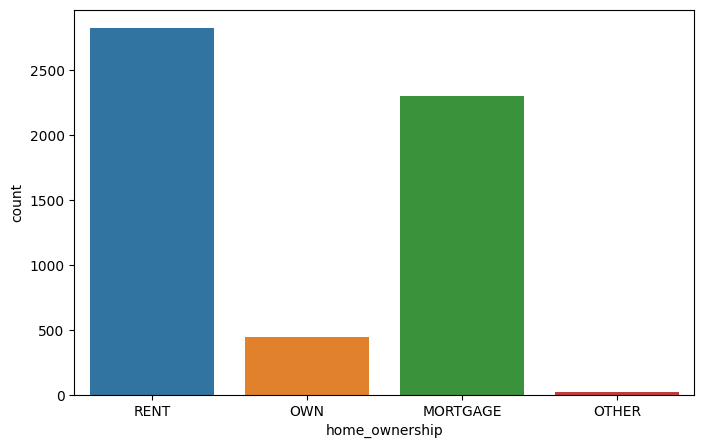

In [30]:
sns.countplot(x ='home_ownership', data=df[df.loan_status == 'Charged Off'])

* The above visual show that only a minority of applicants own a house. Majority of them either rent or are on mortgage.
* Most applicants take loan for debt consolidation, followed by credit card dues.

In [31]:
# creating groups to convert numeric columns to categorical

df['int_rate_groups'] = pd.cut(df['int_rate'], bins=6, labels=['5% - 8%','8% - 11%','11% - 14%','14% - 17%','17% - 20%', '20% - 24%'])
df['total_acc_groups'] = pd.cut(df['total_acc'], bins=6, labels=['2 - 16','16 - 30','30 - 45','45 - 60','60 - 75', '75 - 90'])
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=6, labels=['4k - 40k','40k - 80k','80k - 120k','120k - 160k','160k - 200k', '200k - 240k'])

<AxesSubplot:xlabel='int_rate_groups', ylabel='count'>

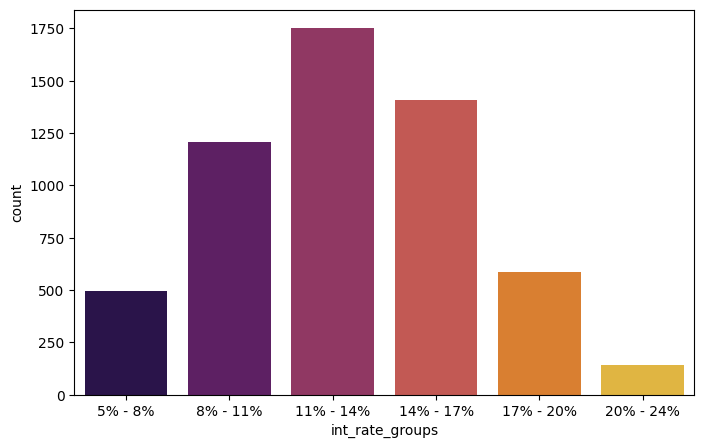

In [32]:
sns.countplot(x='int_rate_groups', data=df[df.loan_status == 'Charged Off'], palette="inferno")

<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

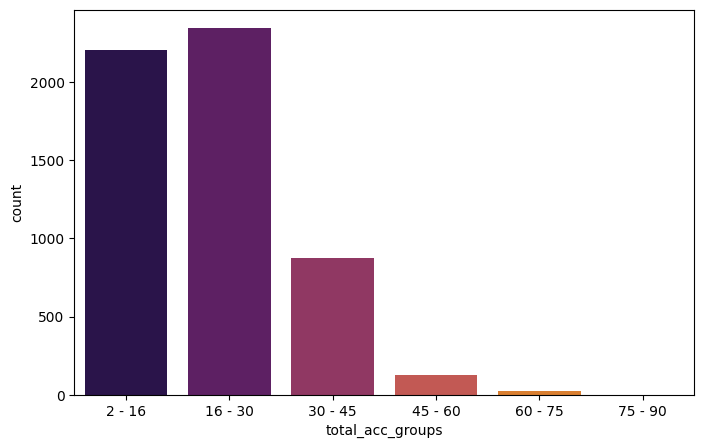

In [33]:
sns.countplot(x='total_acc_groups', data=df[df.loan_status == 'Charged Off'], palette='inferno')

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

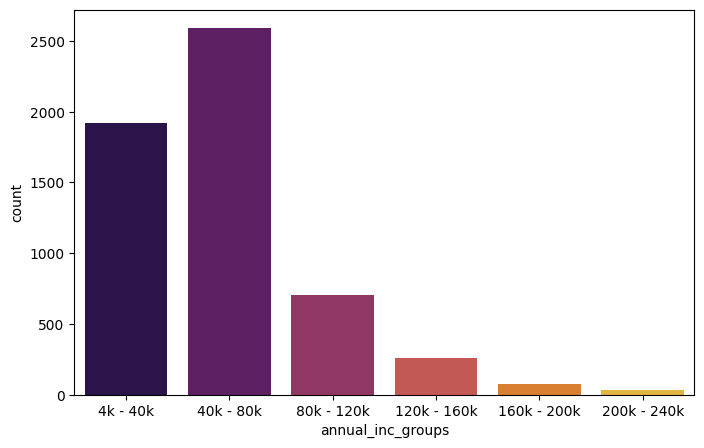

In [34]:
sns.countplot(x='annual_inc_groups', data=df[df.loan_status == 'Charged Off'], palette='inferno')

In [35]:
df['installment_groups'] = pd.cut(df['installment'], bins=5, labels=['15 - 250','250 - 500','500 - 750','750 - 1000', '1000 - 1500'])
df['funded_amnt_groups'] = pd.cut(df['funded_amnt'], bins=7, labels=['0 - 4.5k','4.5k - 9k','9k - 13.5k','13.5k - 18k','18k - 22.5k','22.5k - 27k','27k - 35k'])
df['dti_groups'] = pd.cut(df['dti'], bins=6, labels=['0 - 5','5 - 10','10 - 15','15 - 20','20 - 25', '25 - 30'])

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

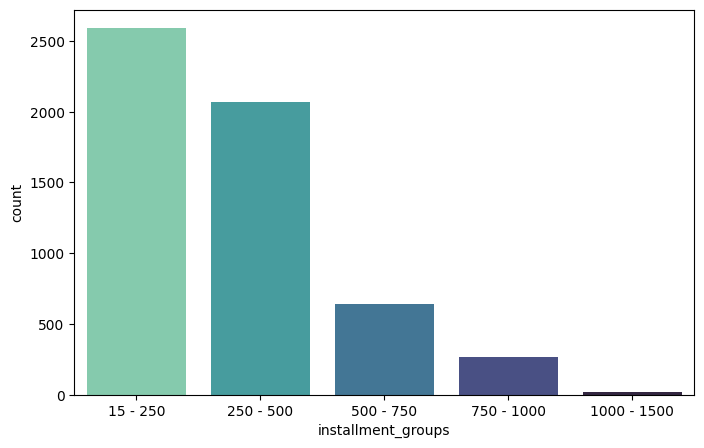

In [36]:
sns.countplot(x='installment_groups', data=df[df['loan_status']=='Charged Off'], palette='mako_r')

<AxesSubplot:xlabel='funded_amnt_groups', ylabel='count'>

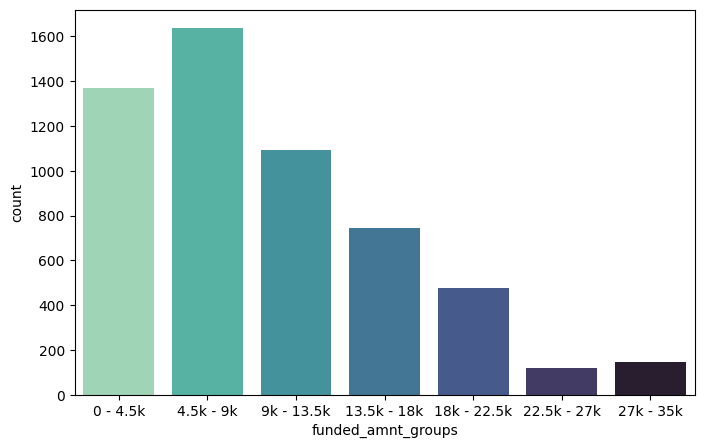

In [37]:
sns.countplot(x='funded_amnt_groups', data=df[df['loan_status']=='Charged Off'], palette='mako_r')

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

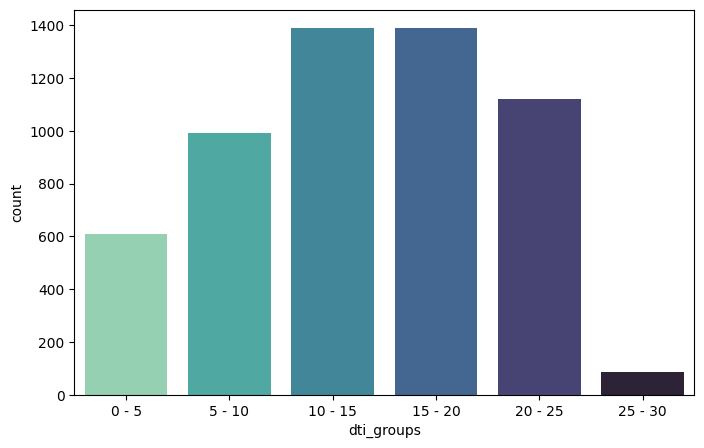

In [38]:
sns.countplot(x='dti_groups', data=df[df['loan_status']=='Charged Off'], palette='mako_r')

### Observations
Based on the Univariate Analysis, applicants may default when they have: 
* house_ownership as "RENT"
* purpose as "debt_consolidation", that is, taking loan to clear other debts
* dti between 10-20
* annual_inc between 40k-80k
* int_rate between 11%-14%
* funded_amnt between 4.5k-9k

## Bivariate Analysis

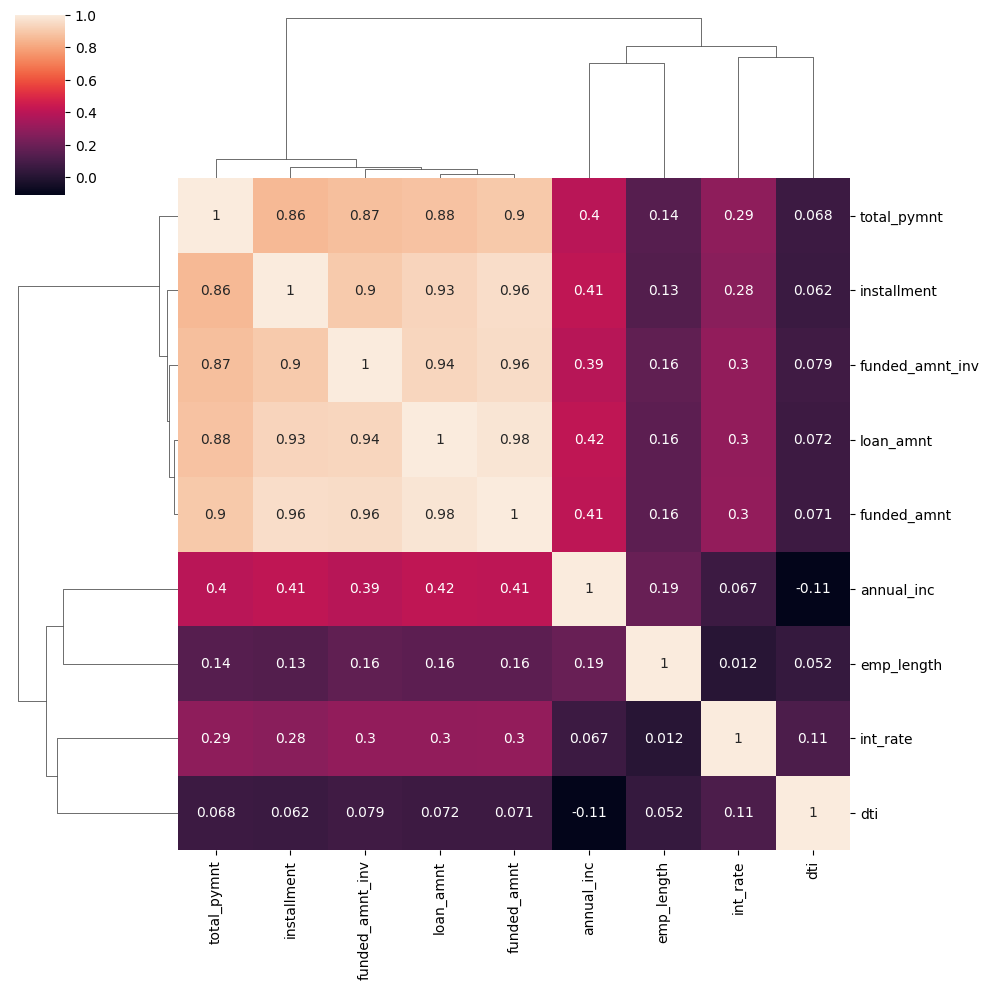

In [39]:
# plotting correlation between numeric columns

is_num = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']

df_correlation = df[is_num].corr()
sns.clustermap(df_correlation, annot=True)

* As expected, there's a high correlation among total_pymnt, installment, funded_amnt_inv, loan_amnt, funded_amnt.
* There's a negative correlation between annual_inc and dti. DTI is the ratio of total monthly debt payments and monthly income.
* A negative correlation here makes sense because the more you earn, the less likely you'll be in debt, and vice-versa.

<AxesSubplot:xlabel='emp_length', ylabel='annual_inc'>

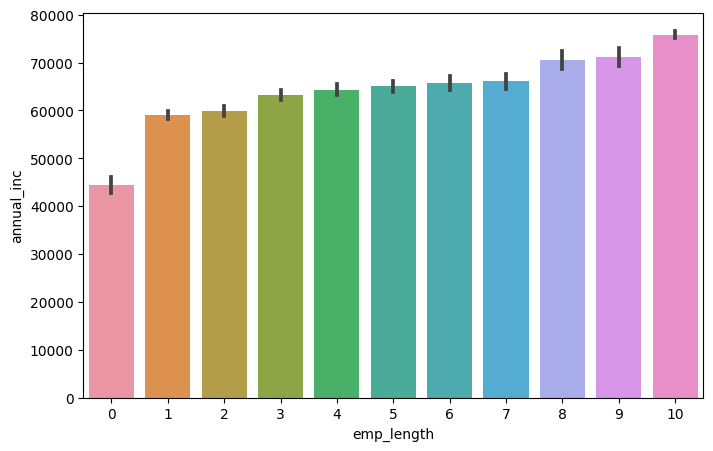

In [48]:
# plotting emp_length against annual_inc
sns.barplot(data=df, x='emp_length', y='annual_inc',)

* The above visual shows that as an applicant grows in professional experience, his annual income also increases.
* It also shows there's a sudden increase in annual income from fresher to an year of experience.

Let's dive further into emp_length vs annual_inc

<AxesSubplot:xlabel='emp_length', ylabel='annual_inc'>

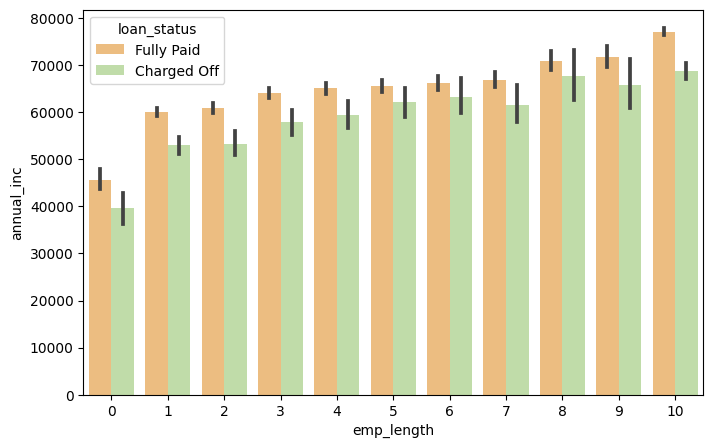

In [49]:
# plotting emp_length against annual_inc with loan_status
sns.barplot(data=df, x='emp_length', y='annual_inc', hue='loan_status', palette='Spectral')

<AxesSubplot:xlabel='emp_length', ylabel='count'>

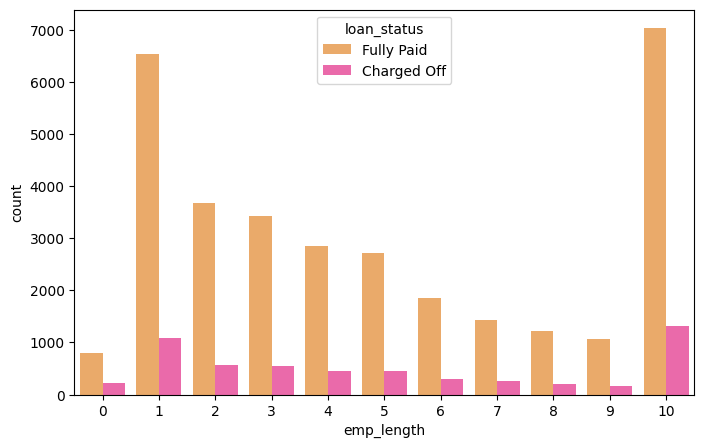

In [50]:
sns.countplot(data=df, x='emp_length', hue='loan_status', palette="spring_r")

* Combining interpretation from both the plots above, most of the loans are issued to applicants having an year of experience or more than 10 years of experience.
* The default rate in both these years is high too. For applicants with an year of experience, this might be due to them taking loans with sudden increase in their annual income and later realizing they can't pay it off.

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

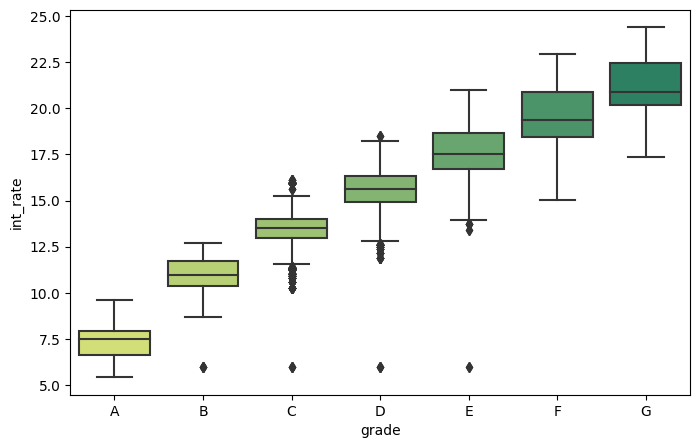

In [51]:
# plot grade against int_rate
sns.boxplot(data=df, x='grade', y='int_rate', order='ABCDEFG', palette="summer_r")

* Grade has a relation with credit history of the borrower. It is clear that intrest rate is increasing with grades moving from A to F.

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

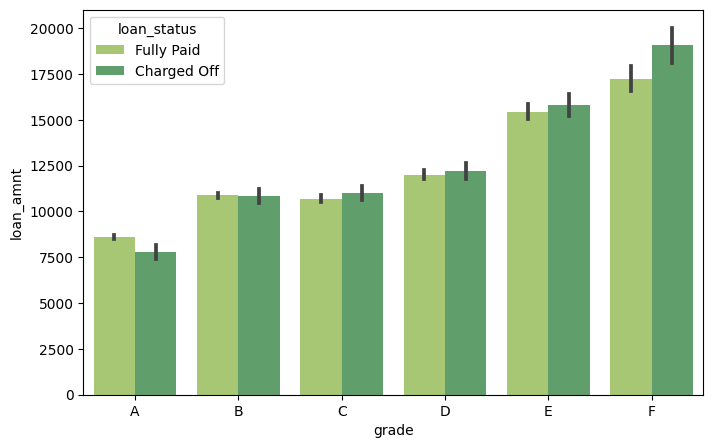

In [64]:
sns.barplot(data=df, x='grade', y='loan_amnt', hue='loan_status', order='ABCDEF', palette='summer_r')

* Charged Off rate is high for grade E and F, with grade F being the highest.

<AxesSubplot:xlabel='int_rate_groups', ylabel='annual_inc'>

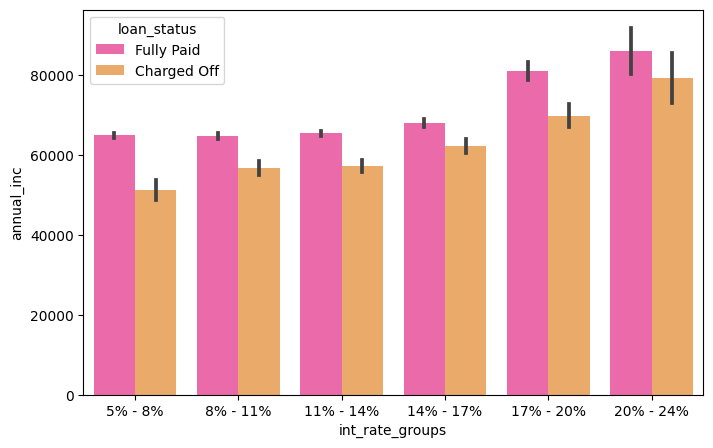

In [52]:
# plot annual_inc against int_rate_groups
sns.barplot(data=df, x='int_rate_groups', y='annual_inc', hue ='loan_status', palette='spring')

* Charged Off ratio increases as the int_rate increases

<AxesSubplot:xlabel='annual_inc_groups', ylabel='int_rate'>

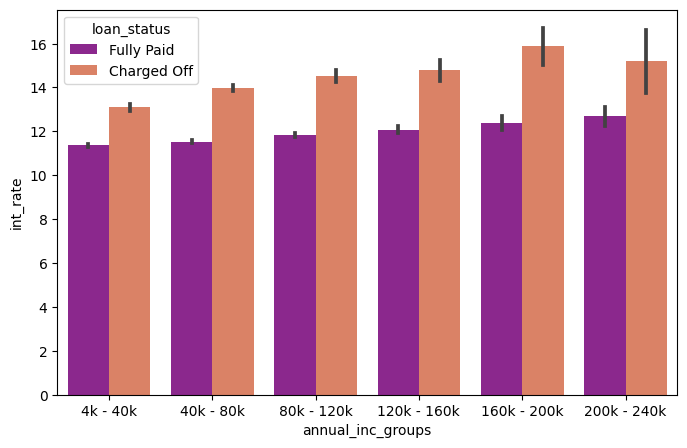

In [53]:
# plot annual_inc against int_rate_groups
sns.barplot(data=df, y='int_rate', x='annual_inc_groups', hue ='loan_status', palette="plasma")

* Charged Off ratio is the highest for applicants with annual_inc between 160k-200k and int_rate over 15%

<AxesSubplot:xlabel='emp_length', ylabel='loan_amnt'>

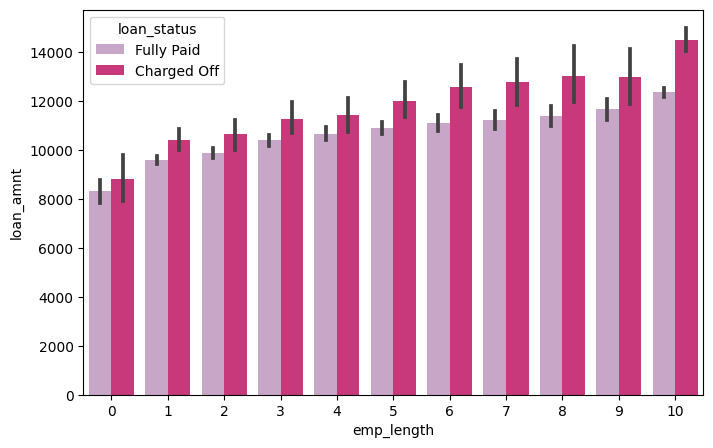

In [54]:
sns.barplot(data=df,y='loan_amnt', x='emp_length', hue ='loan_status', palette="PuRd")

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

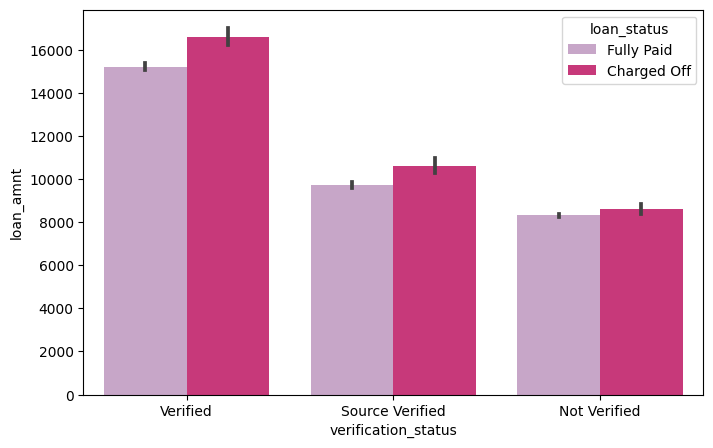

In [55]:
sns.barplot(data=df,y='loan_amnt', x='verification_status', hue ='loan_status',palette="PuRd")

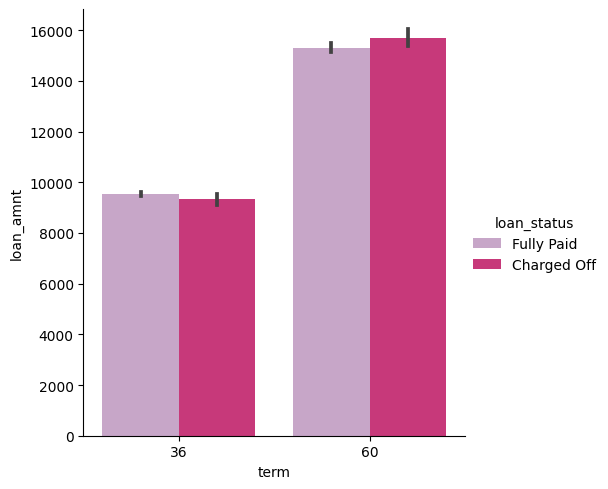

In [56]:
sns.catplot(data=df, x='term', y='loan_amnt', hue='loan_status', kind='bar', palette='PuRd')

### Observations
Based on the Bivariate Analysis, applicants may default when they have: 
* emp_length more than 10 years and annual_inc above 60k
* int_rate between 20%-24% and annual_inc above 60k
* emp_length more than 10 years and loan_amnt greater than 14k
* verified loan and loan_amnt above 16k
* term as 60 months and loan_amnt more than between 14k-16k
* grade is F and loan_amnt greater than 15k

## Recommendations
Based on the above analysis, few of the recommendations are:
* refrain from approving loans with loan amount over 14k and interest rate over 20%
* avoid approving loans for applicants with over 10 years as employment lenght
* loan applications for debt consolidation should not be approved
* avoid loan approval for grade F and loan_amnt greater than 15k